학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


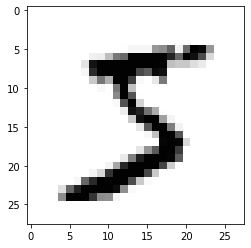

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


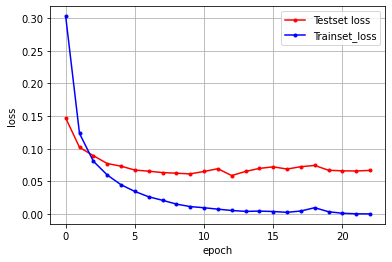

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수: %d 개' %(X_train.shape[0]))
print('테스트셋 이미지 수: %d 개' % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# 코드로 확인
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')


# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값 확인
print('class : %d ' % (Y_class_train[0]))

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()